# IOTA 101: Essentials and IOTA Terminology
IOTA is an open-source Distributed Ledger Technology (DLT) with the following characteristics: *permissionless*, *feeless* and *trustless*. In contrary to the blockchain technology, the IOTA transactions are stored in a form of Directed Acyclic Graph (DAG) called *the Tangle*.
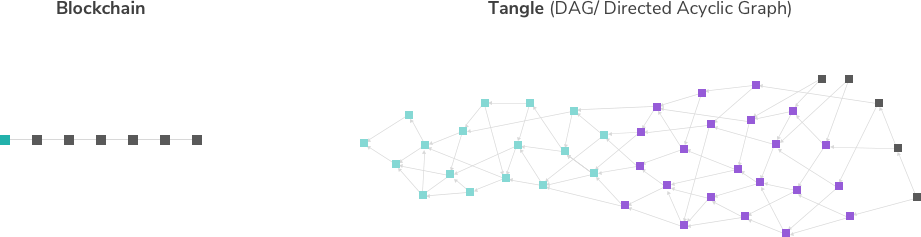

## Transactions
Transactions (TXs) in the tangle can be of two types:
* **Value transactions** (*IOTA token* represents funds in case of value transactions)
* **Zero-value transactions** (aka meta transactions)

Every transaction is attached to a specific *IOTA Address*.
There are no miners with IOTA protocol to validate transactions. The *consensus* is achieved by network participants themselves. Each participant that wants to broadcast a new transaction has to approve 2 past transactions and basically attach transaction as a children node. Transactions without children transactions (waiting to be confirmed) are called *tips*.

## Seed, private key and address
Pair of unique IOTA address and corresponding *Private Key* is determistically generated from a *Seed*. You can generate (2<sup>53</sup> - 1) different addresses/private keys based on one Seed. Anybody can send anything to the given address however only Seed owner can send funds from IOTA address since only the Seed owner is able to generate corresponding *Private Key*.

IOTA protocol uses One-Time Signature (OTS) for "verifying" whether private key matches to the given address, specifically Winternitz OTS (WOTS). So *Private Key* (specifically *Key Fragments* of the private key) is the key component while signing transactions using WOTS.

That's the reason why nobody should use IOTA address that have been already funds spent from. New IOTA address (of the given seed) should be generated and used instead. Please note, it applies only to fund-spending. Receiving funds/data is totaly fine even multiple times.

To summarize the key concept here. Only *Seed* is needed to be stored somewhere. Everything else can be safely generated from it: private key as well as address.

## IOTA nodes
The Tangle runs on a *distributed network* of IOTA nodes called *mainnet*. There are also other separate "Tangles" serving for specific purposes: Devnet, SPAMnet, etc. You can interact with the network via public nodes using collection of public *API calls*. You can interact with any public node of the given network since all nodes "gossiping" all TXs across the whole network. Nodes are powered by a reference piece of software called *IRI* (IOTA Reference Implementation) **as of now**.

It is also important to mention that you do not exchange any sensitive information such as *Seed* with a node. Every sensitive operation such as TX signing is done on client's side and node is just a "messenger" that delivers your TX to the IOTA network.
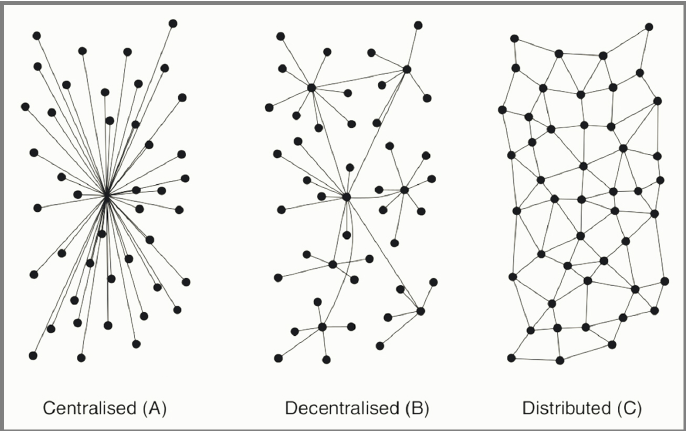

## Custom node
You can even run own IOTA node and actively participate to the whole network. There is a big advantage for developers in that case. Actual implementation of IRI  provides an usefull real-time information via messaging platform called ZeroMQ and so developers can leverage that.

## API calls
There are ready-made libraries for major programming languages available and so you have more developer-friendly way how to interact with the IOTA network. Anyway, you can interact with IOTA network using pure API calls without any library. It is up to you.


## Ternary
It is difficult to avoid mentioning *Ternary numeral system* while discussing IOTA at all. IOTA is based on ternary system under the hood and so you have got to be aware of some basic terminology in this respect. You are going to face this fact in any developer-related IOTA guide out there.

### Ternary
Ternary has three as its base (aka base 3) as opposted to *binary* which is base 2. Instead of two states (0 and 1) it recognizes three states (for ex. -1, 0, 1).

### Trit
One *Trite* is analogous to one *bit*. It is the smallest digit and has three states. Trit = **Tri**nary dig**it**.

### Tryte
*Tryte* consists of three *trits* meaning 27 combinations.
$$3^3=27$$

You will recognize soon that almost everything is encoded in *Trytes* in the IOTA world. Tryte is visually represented using [A..Z] alphabets and number 9. One character represents one tryte (here comes 27 possible characters again). *Don't be mad, IOTA libraries are going to help us.*

Small example:

In [19]:
import iota #importing PyOTA library to interact with
from pprint import pprint

TrytesAsBytes = b"YZJEATEQ9JKLZ" # some data encoded in Trytes (byte string in Python, not unicode string)
Trytes = iota.TryteString(TrytesAsBytes) # initializing TryteString type from the PyOTA library - great help while dealing with Trytes/Trits, etc.
pprint(Trytes) # getting the same data however using TryteString type of PyOTA library
pprint("Number of Trytes: %s" % len(TrytesAsBytes))
Trits = Trytes.as_trits() # converting Trytes to Trits
pprint(Trits,compact=True)
pprint("Number of trits: %s" % len(Trits)) # Number of trits is three times the number of trytes obviously

TryteString(b'YZJEATEQ9JKLZ')
'Number of Trytes: 13'
[1, -1, 0, -1, 0, 0, 1, 0, 1, -1, -1, 1, 1, 0, 0, -1, 1, -1, -1, -1, 1, -1, 0,
 -1, 0, 0, 0, 1, 0, 1, -1, 1, 1, 0, 1, 1, -1, 0, 0]
'Number of trits: 39'


# IOTA 101: Basic network interactions
The tutorial is based on an official Python library called *PyOTA*. It encapsulates all official IRI API calls and it can be installed via *PIP* in any Python environment. If you are viewing this tutorial on *Azure Notebooks* then you do not have to worry about it. The Python environment is already configured for you including the PyOTA. So you can just directly playing with code snippets in your web browser.

Anyway, most of the information in the tutorial is language-agnostic and so only implementation details slightly differ across different programming languages. Top-level details are the same regardless programming language you are going to use for your project. I based all code snippets on the Python language since it is understandable language even for beginners.


## Conneting to IOTA nodes
Before you can interact with the IOTA network you need an URL of the running IOTA node. There are dozen of directories of public nodes available, feel free to google them.

For a sake of this tutorial I use a project called *Carriota Field*. It is a load ballancer and incentivizer that provides you an access to a pool of participanting nodes (thousands of nodes) effortlessly.
* *Advantage:* you do not have to care about public nodes and whether they are running or not
* *Disadvantage:* you do not know in advance which specific node will process your API call. So in some respect results of API calls may differ since some API calls depend on specific node, such as GetNodeInfo().

### Node is not synced
Even if a node is up and running it may not be fully prepared to process your API calls correctly. The node should be "synced", meaning should be aware of all TXs in the Tangle. It is better to avoid not fully synced nodes.

### Health checking
Once you connect to an IOTA node you should be able to send API calls. However it is better to do some checks in advance in order to find out whether the given node is in good condition or not. IOTA nodes can be run by anyone and so health check is always a good practice.

Basic healthcheck can be done via *GetNodeInfo()* API call. It returns a basic information about the given IOTA node.

In [20]:
import iota #importing PyOTA library to interact with
from pprint import pprint

NodeURL = "https://field.carriota.com:443"

api=iota.Iota(NodeURL) # ctor initialization of the PyOTA library
result = api.get_node_info() # basic API call to double check health conditions
pprint(result) # result is printed out

# Basic check whether node is in sync or not
# Elementary rule is that "latestMilestoneIndex" should equal to "latestSolidSubtangleMilestoneIndex" or be very close
if abs(result['latestMilestoneIndex'] - result['latestSolidSubtangleMilestoneIndex']) > 3 :
    print ("\r\nNode is probably not synced!")
else:
    print ("\r\nNode is probably synced!")


{'appName': 'IRI',
 'appVersion': '1.4.2.4',
 'duration': 25,
 'fieldName': 'TOBG',
 'fieldPublicId': '91edc0d6b0911401',
 'fieldVersion': '0.1.6',
 'jreAvailableProcessors': 16,
 'jreFreeMemory': 161380952,
 'jreMaxMemory': 9320792064,
 'jreTotalMemory': 1841299456,
 'jreVersion': '1.8.0_171',
 'latestMilestone': TransactionHash(b'GAR9SHMASXJIVUVNJKZWYYWRJBXCNMQHT9MHGGFM9FKZFTDKLSYQXVGAKJX9XQZSSWFCLZUSGXIPA9999'),
 'latestMilestoneIndex': 549411,
 'latestSolidSubtangleMilestone': TransactionHash(b'GAR9SHMASXJIVUVNJKZWYYWRJBXCNMQHT9MHGGFM9FKZFTDKLSYQXVGAKJX9XQZSSWFCLZUSGXIPA9999'),
 'latestSolidSubtangleMilestoneIndex': 549411,
 'neighbors': 12,
 'packetsQueueSize': 0,
 'time': 1529573518899,
 'tips': 9994,
 'transactionsToRequest': 51}

Node is probably synced!


*Please note: When using *Carriota Field service* then this type of check is quite useless since other API calls of yours may be served by different node that has not been checked obviously. On the other hand, Carriota Field uses some smart techniques under the hood that should prevent you to use node that is not in a good condition.*

## Generating IOTA seed and IOTA address
Since the IOTA network is *permissionless* type of network, anybody is able to use it and interact with it. No central authority is required at any stage.

So anybody is able to generate own seed and respective private key/address anytime. It is highly recommended to *NOT* use online generators at all.

The Seed is the only key to the given addresses. Anyone who owns the Seed owns also all funds related to respective IOTA addresses (all of them).

Seed and addresses only consists of characters [A-Z] and number 9. Length is always 81 charaters. There are usually also used additional 9 characters in IOTA addresses (so total lenght is 90 then) which is a *checksum*. It provides a way how to prevent typos while manipulating with IOTA addresses.


### Seed
A seed generation is a process that is based on random quessing of each character in the seed. Of course, you should always use cryptographically secure pseudo-random generator!

In [21]:
import random
chars=u'9ABCDEFGHIJKLMNOPQRSTUVWXYZ' #27 characters - max number you can express by one Tryte - do you remember?
rndgenerator = random.SystemRandom() #cryptographically secure pseudo-random generator

NewSeed = u''.join(rndgenerator.choice(chars) for _ in range(81)) #generating 81-chars long seed. This is Python 3.6+ compatible
print(NewSeed)
print("Length: %s" % len(NewSeed))

PYDHTCNKMTVRGORKCKDCHPMIRAIVGB9FZFGUJWZVAQYWUVOEOJUVDEMNGOLWWSOG9QLUHDNVEFYOBFEIK
Length: 81


Alternatively you can leverage also PyOTA library since it has own implementation of the pseudo-random Seed generator (Python 2.7+ compatible). Difference between both methods is very subtle. I just wanted to illustrate both ways: Fully independent and IOTA-library-dependant.

In [22]:
from iota.crypto.types import Seed  #importing PyOTA library to interact with

NewSeed = Seed.random()
print(NewSeed)
print("Length: %s" % len(NewSeed))

SVXJAGAMEMBFFXEWZMLEHYXJNUAQQEEPBLWDZOQB9VPDGPWEQMMMXMDYVTNDDPNUHZXKSUXSTSVYIBCTM
Length: 81


### Address
There is a deterministic function how to get an address from a seed. It is a basically an indexed collection of addresses starting with address at index 0, 1, 2, etc.

While generating addresses you should be also aware there are three different so called *Security Levels* (1, 2 and 3). Each security level generates totally independent pool of addresses. Addresses of Security Level 1 are totally different from addresses of Security Level 2, etc.

In a nutshell, Security Level indicates how difficult is to generate *Private key* from the Seed and also what is its size. The higher security level, the more secure (longer) is the given private key. Default Security Level is 2. Most of IOTA wallets uses Security Level=2 and users are usually not allowed to change it. So be carefull while designing your app.

As long as *seed, address index and security level* are the same, you always get the same address and corresponding private key:

$$PrivateKey/Address = fce(Seed, AddressIndex, SecurityLevel)$$

General Example:
$$PrivateKey/Address1 = fce(Seed, 1, 2)$$
$$PrivateKey/Address2 = fce(Seed, 2, 2)$$
$$PrivateKey/Address3 = fce(Seed, 3, 2)$$

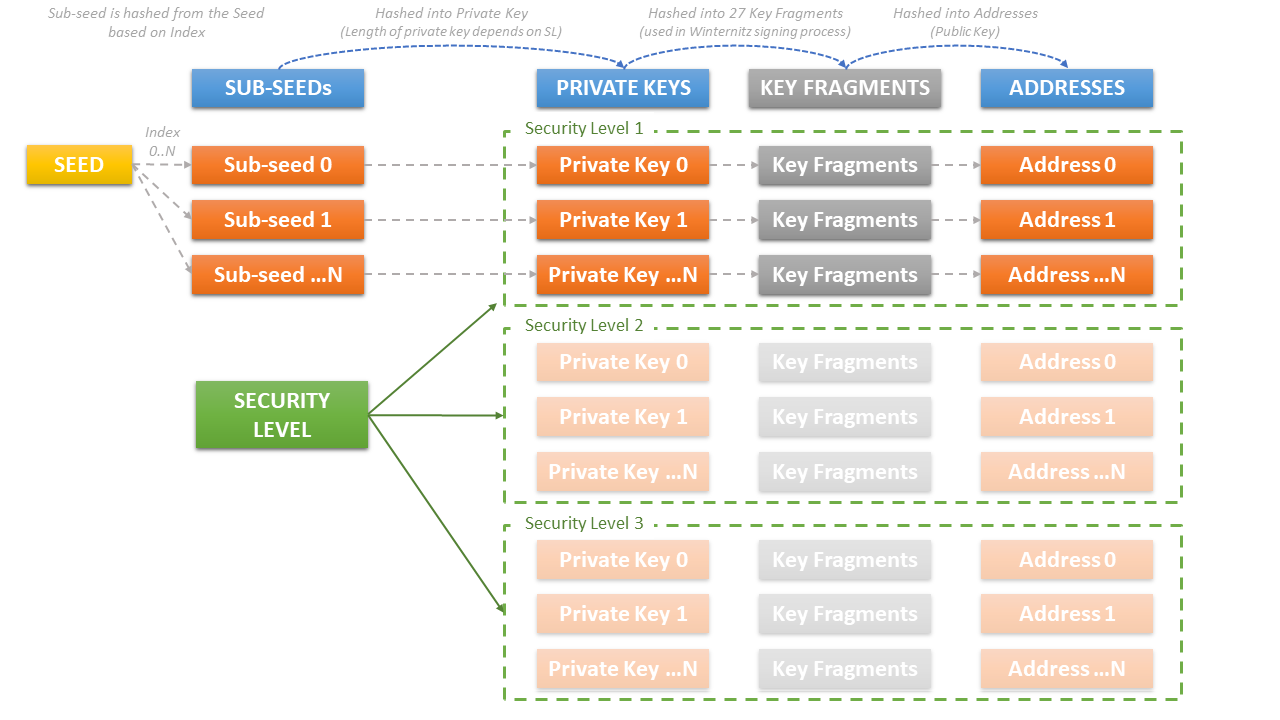

In [23]:
import iota
from pprint import pprint

# For this particular task the Node URL is not important as it will not be contacted at all
# However it has to be well-formatted URI
NodeURL = "https://field.carriota.com:443"
MySeed = b"WKQDUZTGFKSSLACUCHHLZRKZBHSDSCEBHKUPDLKFBQALEBKDMFRPUQGZRXAADPG9TSRTZGGBZOFRJCFMM"

api=iota.Iota(NodeURL,
              seed = MySeed) # if you do not specify a seed, PyOTA library randomly generates one for you under the hood
    
# Let's generate 3 addresses using default security level=2.
# It is deterministic function - it always generates same addresses as long as the Seed, Security Level and Index are the same
result = api.get_new_addresses(index=0,
                               count=3,
                               security_level=2)
pprint(result)

{'addresses': [Address(b'HRLKBQUZAEB9HIVWJEWVDYQ9G9VRQXQAXR9ZWGBFQJKRPOPJYHGAT9LBEIE9RWRMUFSNLCWYHQGYAECHD'),
               Address(b'XEXIDJJTANADOUBPWTCSPPRYYRTITRAHDEOZAEXWDPCYKUPTFMKVQM9KCPPLOCESFRGRVSIYZHXQZNYKC'),
               Address(b'KY9DLZCHET9ATLMADPXGDVDYMPHKRKQPJZ9MB9HEIMMFCRRTNJIJIHPKGZNKKDTFMYPZRRQYAQKVAHMYX')]}


Needless to say, `NodeURL` is not important for this task at all. As mentioned earlier, some actions are purely done on client's side. This is one of them.

Anyway, in case of PyOTA library you can directly use an address generator component instead of the whole library. Outputs are equivalent in both cases.

In [24]:
from iota.crypto.addresses import AddressGenerator

MySeed = b"WKQDUZTGFKSSLACUCHHLZRKZBHSDSCEBHKUPDLKFBQALEBKDMFRPUQGZRXAADPG9TSRTZGGBZOFRJCFMM"

#security level is defined during generator init
generator = AddressGenerator(seed=MySeed,
                             security_level=2)

result = generator.get_addresses(0, 3) #index, count
pprint(result)

[Address(b'HRLKBQUZAEB9HIVWJEWVDYQ9G9VRQXQAXR9ZWGBFQJKRPOPJYHGAT9LBEIE9RWRMUFSNLCWYHQGYAECHD'),
 Address(b'XEXIDJJTANADOUBPWTCSPPRYYRTITRAHDEOZAEXWDPCYKUPTFMKVQM9KCPPLOCESFRGRVSIYZHXQZNYKC'),
 Address(b'KY9DLZCHET9ATLMADPXGDVDYMPHKRKQPJZ9MB9HEIMMFCRRTNJIJIHPKGZNKKDTFMYPZRRQYAQKVAHMYX')]


## Validating IOTA address
As mentioned earlier, IOTA address consists of 81 trytes ([A..Z9] characters) or 90 trytes including checksum. Checksum is useful when you want to make sure a valid address was given (no typos, etc.) and so it is a good practise to encourage user of your app using IOTA addresses including checksums = 90 trytes.

PyOTA library is able to help you to deal with some basic patterns such as validating addresses, generating checksums, etc.

In [25]:
import iota
from pprint import pprint

# some IOTA address
Adr = iota.Address(b"CYJV9DRIE9NCQJYLOYOJOGKQGOOELTWXVWUYGQSWCNODHJAHACADUAAHQ9ODUICCESOIVZABA9LTMM9RW")

pprint("Original input excl. checksum address:")
pprint(Adr)
print("Length: %s" % len(Adr))

AdrInclCheckSum = Adr.with_valid_checksum()
print("\nInput address including checksum:")
pprint(AdrInclCheckSum) # the last 9 trytes is the checksum
print("Length incl checksum: %s" % len(AdrInclCheckSum))

'Original input excl. checksum address:'
Address(b'CYJV9DRIE9NCQJYLOYOJOGKQGOOELTWXVWUYGQSWCNODHJAHACADUAAHQ9ODUICCESOIVZABA9LTMM9RW')
Length: 81

Input address including checksum:
Address(b'CYJV9DRIE9NCQJYLOYOJOGKQGOOELTWXVWUYGQSWCNODHJAHACADUAAHQ9ODUICCESOIVZABA9LTMM9RWTHBIRSXTA')
Length incl checksum: 90


You should always make sure your app is dealing with valid IOTA address. Please note, you should also make sure an address is of correct length and consists only of allowed characters.

For example the following snippet:
* Checks length manually - since PyOTA library accepts also addresses with less than 80 trytes
* Checks valid characters are used - PyOTA library would thrown an exception in that case

In [1]:
import iota
from pprint import pprint

InputAddr = b"CYJV9DRIE9NCQJYLOYOJOGKQGOOELTWXVWUYGQSWCNODHJAHACADUAAHQ9ODUICCESOIVZABA9LTMM9RWTHBIRSXTA"
if len(InputAddr)!=90:
    print("Incorrect lenght of the given address. Please, use an address including checksum.")
    exit(2)

try:
    # address including checksum
    Adr2 = iota.Address(InputAddr)
except :
    print("Not valid input address given")
    exit(1)

pprint("Input address incl checksum:")
pprint(Adr2)
print("Is it valid addr based on checksum? %s" % (Adr2.is_checksum_valid()))

print("\nInput address excl checksum:")
pprint(Adr2[:81]) # return only first 81 characters

'Input address incl checksum:'
Address(b'CYJV9DRIE9NCQJYLOYOJOGKQGOOELTWXVWUYGQSWCNODHJAHACADUAAHQ9ODUICCESOIVZABA9LTMM9RWTHBIRSXTA')
Is it valid addr based on checksum? True

Input address excl checksum:
TryteString(b'CYJV9DRIE9NCQJYLOYOJOGKQGOOELTWXVWUYGQSWCNODHJAHACADUAAHQ9ODUICCESOIVZABA9LTMM9RW')
